# Zental Network Service center Performance Report
### By: David Raymond

##### Last updated: 26/04/2023

## Introduction
#### I will be working with zental network service center. They are a customer service center that responds to customers having  complaint of any kind regarding Zentel Network. Some of these customers have a Service level agreement with the Network service provider to resolve their daily queries within a particular average duration. This service center has different Managers and operators that attend to customers' issues.

### Scenerio
#### Zental network service centreer is here to resolve issues clients are having with the network services. Normally based on the Service Level Agreement between Zentel incorporated and the clients,
#### - All issues must be responsede within 10 seconds of ticket initiation
#### - All issues must be resolved within 3 hours of response
#### - Average Ticket response time must not exceed 15 seconds
#### - Any ticket not resolved within 3 hours must be escalated to the Manager
#### Zental network service center is looking to imorove their service to better serve the customers and i am here to provide insights on how to do that. 

## Objectives
#### - My objective is to get the general overview of the performance of Zental network service center   based on relevant metrics.
#### - I will also be picking sides based on data, regarding the decision to shift the daily Turn Around Time.
#### - I will shedding more light to show the key factors leading to a delay in ticket response time.
#### - I will also be analysing the data to see which of the operators are performing well and which are struggling to meet up with the required resolution Time.


## Data Source
#### The dataset was provided by datacamp and is available on github to clone. The dataset is on a micosoft excel worksheet but i need to convert it to a csv file to work with it better on r.

In [166]:
#Load Packages
pacman::p_load(lubridate,tidyverse, ggplot2, dplyr, readxl, janitor, data.table, tidyr, scales)

In [167]:
#Loading Dataset

service_data <- read_excel("/kaggle/input/zentel-network-service-performance/Zentel Network Service Ticket Data.xlsx", sheet = 1)
employee <- read_excel("/kaggle/input/zentel-network-service-performance/Zentel Network Service Ticket Data.xlsx", sheet = 2)
service_type <- read_excel("/kaggle/input/zentel-network-service-performance/Zentel Network Service Ticket Data.xlsx", sheet = 3)
channel_type  <- read_excel("/kaggle/input/zentel-network-service-performance/Zentel Network Service Ticket Data.xlsx", sheet = 4)
fault_type  <- read_excel("/kaggle/input/zentel-network-service-performance/Zentel Network Service Ticket Data.xlsx", sheet =5)
location  <- read_excel("/kaggle/input/zentel-network-service-performance/Zentel Network Service Ticket Data.xlsx", sheet = 6)
resources  <- read_excel("/kaggle/input/zentel-network-service-performance/Zentel Network Service Ticket Data.xlsx", sheet = 7)


#lets see a preview of the dataset we are working with
#glimpse(zental_dataset)
glimpse(service_data)
glimpse(employee)
glimpse(service_type)
glimpse(channel_type)
glimpse(fault_type)
glimpse(location)
glimpse(resources)

Rows: 5,998
Columns: 12
$ `Report ID`         <chr> "AXA-20201231-1101-WLESS", "AXA-20201230-1102-WLES…
$ `Report Channel`    <chr> "CH01", "CH01", "CH01", "CH01", "CH01", "CH01", "C…
$ `Customer Name`     <chr> "Access", "Access", "Access", "Arik", "Arik", "Ari…
$ `State Key`         <chr> "NGS001", "NGS001", "NGS001", "NGS002", "NGS003", …
$ `Ticket Open Time`  <dttm> 2020-12-31 17:07:04, 2020-12-30 19:04:06, 2020-12…
$ `Ticket Resp Time`  <dttm> 2020-12-31 17:10:20, 2020-12-30 19:13:18, 2020-12…
$ `Issue Res Time`    <dttm> 2020-12-31 20:44:42, 2020-12-30 19:46:30, 2020-12…
$ `Fault Type`        <chr> NA, "Customers End", "Customers End", "Line damage…
$ Operator            <chr> "Tunde", "Sekina", "Sherifat", "Kingsley", "Kola",…
$ `Ticket Close Time` <dttm> NA, 2021-01-01 13:27:17, 2020-12-30 13:20:43, 202…
$ `Ticket Status`     <chr> "Active", "Completed", "Completed", "Completed", "…
$ `Business Status`   <chr> "Open", "Closed", "Closed", "Closed", "Closed", "C…
Rows: 32
Columns

In [168]:
#Removing spaces in colnames for proper naming
colnames(service_data) <- gsub(" ", "_", colnames(service_data))
colnames(employee)  <- gsub(" ", "_", colnames(employee))
colnames(service_type)  <- gsub(" ", "_", colnames(service_type))
colnames(channel_type)  <- gsub(" ", "_", colnames(channel_type))
colnames(fault_type)  <- gsub(" ", "_", colnames(fault_type))
colnames(location)  <- gsub(" ", "_", colnames(location))



glimpse(service_data)
glimpse(employee)
glimpse(service_type)
glimpse(channel_type)
glimpse(fault_type)
glimpse(location)

Rows: 5,998
Columns: 12
$ Report_ID         <chr> "AXA-20201231-1101-WLESS", "AXA-20201230-1102-WLESS"…
$ Report_Channel    <chr> "CH01", "CH01", "CH01", "CH01", "CH01", "CH01", "CH0…
$ Customer_Name     <chr> "Access", "Access", "Access", "Arik", "Arik", "Arik"…
$ State_Key         <chr> "NGS001", "NGS001", "NGS001", "NGS002", "NGS003", "N…
$ Ticket_Open_Time  <dttm> 2020-12-31 17:07:04, 2020-12-30 19:04:06, 2020-12-2…
$ Ticket_Resp_Time  <dttm> 2020-12-31 17:10:20, 2020-12-30 19:13:18, 2020-12-2…
$ Issue_Res_Time    <dttm> 2020-12-31 20:44:42, 2020-12-30 19:46:30, 2020-12-2…
$ Fault_Type        <chr> NA, "Customers End", "Customers End", "Line damage",…
$ Operator          <chr> "Tunde", "Sekina", "Sherifat", "Kingsley", "Kola", "…
$ Ticket_Close_Time <dttm> NA, 2021-01-01 13:27:17, 2020-12-30 13:20:43, 2020-…
$ Ticket_Status     <chr> "Active", "Completed", "Completed", "Completed", "Co…
$ Business_Status   <chr> "Open", "Closed", "Closed", "Closed", "Closed", "Clo…
Rows: 32
Columns

In [169]:


#first i have to convert the ticket_open_time and ticket_close_time to POSIXct format, which allows for arithmetic operations.

service_data$Response_Time <- as.numeric(difftime(service_data$Ticket_Resp_Time, service_data$Ticket_Open_Time, units = "secs"))
service_data$Response_Time <- strftime(as.POSIXct(service_data$Response_Time, origin="1970-01-01"), format = "%H:%M:%S")

#Resolve Time
service_data$Resolve_Time <- as.numeric(difftime(service_data$Issue_Res_Time, service_data$Ticket_Resp_Time, units = "secs"))
service_data$Resolve_Time <- strftime(as.POSIXct(service_data$Resolve_Time, origin="1970-01-01"), format = "%H:%M:%S")


glimpse(service_data)






Rows: 5,998
Columns: 14
$ Report_ID         <chr> "AXA-20201231-1101-WLESS", "AXA-20201230-1102-WLESS"…
$ Report_Channel    <chr> "CH01", "CH01", "CH01", "CH01", "CH01", "CH01", "CH0…
$ Customer_Name     <chr> "Access", "Access", "Access", "Arik", "Arik", "Arik"…
$ State_Key         <chr> "NGS001", "NGS001", "NGS001", "NGS002", "NGS003", "N…
$ Ticket_Open_Time  <dttm> 2020-12-31 17:07:04, 2020-12-30 19:04:06, 2020-12-2…
$ Ticket_Resp_Time  <dttm> 2020-12-31 17:10:20, 2020-12-30 19:13:18, 2020-12-2…
$ Issue_Res_Time    <dttm> 2020-12-31 20:44:42, 2020-12-30 19:46:30, 2020-12-2…
$ Fault_Type        <chr> NA, "Customers End", "Customers End", "Line damage",…
$ Operator          <chr> "Tunde", "Sekina", "Sherifat", "Kingsley", "Kola", "…
$ Ticket_Close_Time <dttm> NA, 2021-01-01 13:27:17, 2020-12-30 13:20:43, 2020-…
$ Ticket_Status     <chr> "Active", "Completed", "Completed", "Completed", "Co…
$ Business_Status   <chr> "Open", "Closed", "Closed", "Closed", "Closed", "Clo…
$ Response_Time 

In [170]:

#Lets first convert the two datetime columns to POSIXct
service_data$Ticket_Open_Time <- as.POSIXct(service_data$Ticket_Open_Time)
service_data$Ticket_Resp_Time <- as.POSIXct(service_data$Ticket_Resp_Time)
service_data$Issue_Res_Time <- as.POSIXct(service_data$Issue_Res_Time)

# Calculate the time difference in seconds
service_data$Time_Of_Resp <- difftime(service_data$Ticket_Resp_Time, service_data$Ticket_Open_Time, units = "secs")
service_data$Reslv_Time <- difftime(service_data$Issue_Res_Time, service_data$Ticket_Open_Time, units = "hours")

head(service_data)

Report_ID,Report_Channel,Customer_Name,State_Key,Ticket_Open_Time,Ticket_Resp_Time,Issue_Res_Time,Fault_Type,Operator,Ticket_Close_Time,Ticket_Status,Business_Status,Response_Time,Resolve_Time,Time_Of_Resp,Reslv_Time
<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<drtn>,<drtn>
AXA-20201231-1101-WLESS,CH01,Access,NGS001,2020-12-31 17:07:04,2020-12-31 17:10:20,2020-12-31 20:44:42,NA,Tunde,NA,Active,Open,00:03:16,03:34:22,196 secs,3.6272222 hours
AXA-20201230-1102-WLESS,CH01,Access,NGS001,2020-12-30 19:04:06,2020-12-30 19:13:18,2020-12-30 19:46:30,Customers End,Sekina,2021-01-01 13:27:17,Completed,Closed,00:09:12,00:33:12,552 secs,0.7066667 hours
AXA-20201229-1103-WLESS,CH01,Access,NGS001,2020-12-29 18:28:04,2020-12-29 18:37:52,2020-12-29 20:10:11,Customers End,Sherifat,2020-12-30 13:20:43,Completed,Closed,00:09:48,01:32:19,588 secs,1.7019444 hours
AXA-20201229-1104-HSE,CH01,Arik,NGS002,2020-12-29 14:49:16,2020-12-29 14:58:23,2020-12-29 16:03:56,Line damage,Kingsley,2020-12-29 21:34:31,Completed,Closed,00:09:07,01:05:33,547 secs,1.2444444 hours
AXA-20201231-1105-HSE,CH01,Arik,NGS003,2020-12-31 21:43:03,2020-12-31 21:47:39,2020-12-31 22:20:58,Customers End,Kola,2021-01-02 06:54:01,Completed,Closed,00:04:36,00:33:19,276 secs,0.6319444 hours
AXA-20201231-1106-HSE,CH01,Arik,NGS003,2020-12-31 10:34:09,2020-12-31 10:37:57,2020-12-31 12:42:27,Customers End,Tunde,2020-12-31 14:36:59,Completed,Closed,00:03:48,02:04:30,228 secs,2.1383333 hours


In [171]:
# Create a logical matrix indicating which cells are missing
missing_data <- is.na(service_data)

# Find the sum of missing data in each column
colSums(missing_data)



Report_ID    Report_Channel     Customer_Name         State_Key 
                0                 0                 0                 0 
 Ticket_Open_Time  Ticket_Resp_Time    Issue_Res_Time        Fault_Type 
                0                 0                 0               526 
         Operator Ticket_Close_Time     Ticket_Status   Business_Status 
                0               639                 0                 0 
    Response_Time      Resolve_Time      Time_Of_Resp        Reslv_Time 
                0                 0                 0                 0

#### We can see from the outcome that 526 cells in Fault_Type column have mising value and 639 cells in Ticket_status Column have missing value too. We will need to delete the entire row for us to work with the data.


In [172]:
# Identify rows with missing data
missing_rows <- rowSums(is.na(service_data)) > 0


# Remove the rows with missing data
service_data <- na.omit(service_data)

as_tibble(service_data)

Report_ID,Report_Channel,Customer_Name,State_Key,Ticket_Open_Time,Ticket_Resp_Time,Issue_Res_Time,Fault_Type,Operator,Ticket_Close_Time,Ticket_Status,Business_Status,Response_Time,Resolve_Time,Time_Of_Resp,Reslv_Time
<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<drtn>,<drtn>
AXA-20201230-1102-WLESS,CH01,Access,NGS001,2020-12-30 19:04:06,2020-12-30 19:13:18,2020-12-30 19:46:30,Customers End,Sekina,2021-01-01 13:27:17,Completed,Closed,00:09:12,00:33:12,552 secs,0.7066667 hours
AXA-20201229-1103-WLESS,CH01,Access,NGS001,2020-12-29 18:28:04,2020-12-29 18:37:52,2020-12-29 20:10:11,Customers End,Sherifat,2020-12-30 13:20:43,Completed,Closed,00:09:48,01:32:19,588 secs,1.7019444 hours
AXA-20201229-1104-HSE,CH01,Arik,NGS002,2020-12-29 14:49:16,2020-12-29 14:58:23,2020-12-29 16:03:56,Line damage,Kingsley,2020-12-29 21:34:31,Completed,Closed,00:09:07,01:05:33,547 secs,1.2444444 hours
AXA-20201231-1105-HSE,CH01,Arik,NGS003,2020-12-31 21:43:03,2020-12-31 21:47:39,2020-12-31 22:20:58,Customers End,Kola,2021-01-02 06:54:01,Completed,Closed,00:04:36,00:33:19,276 secs,0.6319444 hours
AXA-20201231-1106-HSE,CH01,Arik,NGS003,2020-12-31 10:34:09,2020-12-31 10:37:57,2020-12-31 12:42:27,Customers End,Tunde,2020-12-31 14:36:59,Completed,Closed,00:03:48,02:04:30,228 secs,2.1383333 hours
AXA-20201231-1107-HSE,CH01,Arik,NGS003,2020-12-31 09:37:03,2020-12-31 09:47:46,2020-12-31 13:33:02,Customers End,Tunde,2020-12-31 22:04:39,Completed,Closed,00:10:43,03:45:16,643 secs,3.9330556 hours
AXA-20201231-1108-HSE,CH01,Arik,NGS003,2020-12-31 08:31:04,2020-12-31 08:40:34,2020-12-31 14:14:19,Customers End,Habeeb,2021-01-01 07:25:36,Completed,Closed,00:09:30,05:33:45,570 secs,5.7208333 hours
AXA-20201231-1109-HSE,CH01,Arik,NGS003,2020-12-31 07:52:07,2020-12-31 07:59:52,2020-12-31 12:15:13,Customers End,John,2020-12-31 21:59:53,Completed,Closed,00:07:45,04:15:21,465 secs,4.3850000 hours
AXA-20201230-1110-HSE,CH01,Arik,NGS003,2020-12-30 23:07:04,2020-12-30 23:15:18,2020-12-31 00:42:45,Customers End,Amelia,2020-12-31 06:56:48,Completed,Closed,00:08:14,01:27:27,494 secs,1.5947222 hours


#### Looking out these tibble, i can see some of the cells on the "response_time and "resolve_time" columns are 0 secs. Which is technically impossible because the minimum response time and resolve time is 01 seconds. 

In [173]:
#Count of number of response time and resolve time that is 0 sec.
sum(service_data$Resolve_Time == "00:00:00")
sum(service_data$Response_Time == "00:00:00")



[1] 793

[1] 793

In [174]:
 #Deleting rows with 0 secs as resolve time and response time because it will negatively affect my analysis.
#Response time and resolve time that are 0 secs means that the data was inacurate eneteredand it will not be needed for this analysis.

service_data <- service_data %>% filter(Response_Time != "00:00:00" & Resolve_Time != "00:00:00")

glimpse(service_data)

Rows: 4,164
Columns: 16
$ Report_ID         <chr> "AXA-20201230-1102-WLESS", "AXA-20201229-1103-WLESS"…
$ Report_Channel    <chr> "CH01", "CH01", "CH01", "CH01", "CH01", "CH01", "CH0…
$ Customer_Name     <chr> "Access", "Access", "Arik", "Arik", "Arik", "Arik", …
$ State_Key         <chr> "NGS001", "NGS001", "NGS002", "NGS003", "NGS003", "N…
$ Ticket_Open_Time  <dttm> 2020-12-30 19:04:06, 2020-12-29 18:28:04, 2020-12-2…
$ Ticket_Resp_Time  <dttm> 2020-12-30 19:13:18, 2020-12-29 18:37:52, 2020-12-2…
$ Issue_Res_Time    <dttm> 2020-12-30 19:46:30, 2020-12-29 20:10:11, 2020-12-2…
$ Fault_Type        <chr> "Customers End", "Customers End", "Line damage", "Cu…
$ Operator          <chr> "Sekina", "Sherifat", "Kingsley", "Kola", "Tunde", "…
$ Ticket_Close_Time <dttm> 2021-01-01 13:27:17, 2020-12-30 13:20:43, 2020-12-2…
$ Ticket_Status     <chr> "Completed", "Completed", "Completed", "Completed", …
$ Business_Status   <chr> "Closed", "Closed", "Closed", "Closed", "Closed", "C…
$ Response_Time 

In [175]:
# Join service_data and location dataframes
service_data<- merge(service_data, location[,c("State_Key","State")], by.x = "State_Key", by.y = "State_Key")

service_data<- merge(service_data, channel_type[,c("Channel_Key","Channel")], by.x = "Report_Channel", by.y = "Channel_Key")


head(service_data)

,Report_Channel,State_Key,Report_ID,Customer_Name,Ticket_Open_Time,Ticket_Resp_Time,Issue_Res_Time,Fault_Type,Operator,Ticket_Close_Time,Ticket_Status,Business_Status,Response_Time,Resolve_Time,Time_Of_Resp,Reslv_Time,State,Channel
,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<drtn>,<drtn>,<chr>,<chr>
1,CH01,NGS001,AXA-20201230-1102-WLESS,Access,2020-12-30 19:04:06,2020-12-30 19:13:18,2020-12-30 19:46:30,Customers End,Sekina,2021-01-01 13:27:17,Completed,Closed,00:09:12,00:33:12,552 secs,0.7066667 hours,ANAMBRA,Social Media
2,CH01,NGS001,AXA-20201229-1103-WLESS,Access,2020-12-29 18:28:04,2020-12-29 18:37:52,2020-12-29 20:10:11,Customers End,Sherifat,2020-12-30 13:20:43,Completed,Closed,00:09:48,01:32:19,588 secs,1.7019444 hours,ANAMBRA,Social Media
3,CH01,NGS001,AXA-20201216-5210-MCON,SupaTram,2020-12-16 15:12:52,2020-12-16 15:21:28,2020-12-16 16:48:16,Customers End,Brenda,2020-12-16 22:19:07,Completed,Closed,00:08:36,01:26:48,516 secs,1.5900000 hours,ANAMBRA,Social Media
4,CH01,NGS014,AXA-20201224-5997-WiFi6,Transnational,2020-12-24 09:03:32,2020-12-24 09:07:07,2020-12-24 12:13:52,Line damage,Paul,2020-12-24 17:39:15,Completed,Closed,00:03:35,03:06:45,215 secs,3.1722222 hours,ONDO,Social Media
5,CH01,NGS009,AXA-20201231-1439-MCON,CCD,2020-12-31 05:37:05,2020-12-31 05:42:10,2020-12-31 07:10:57,Customers End,Habeeb,2020-12-31 18:16:34,Completed,Closed,00:05:05,01:28:47,305 secs,1.5644444 hours,NASARAWA,Social Media
6,CH01,NGS014,AXA-20201231-1963-WLESS,International,2020-12-31 17:40:07,2020-12-31 17:40:46,2020-12-31 22:24:02,Customers End,Boye,2021-01-02 06:35:14,Completed,Closed,00:00:39,04:43:16,39 secs,4.7319444 hours,ONDO,Social Media


In [176]:
# Duplicate the "Report_ID" column before splitting it
service_data <- service_data %>% 
  mutate(Report_id = Report_ID)


# Separate the "report_id" column into separate columns
service_data <- service_data %>% 
  separate(Report_id, into = c("part_1", "part_2", "part_3", "part_4"), sep = "-")

# Remove the "part_1", "part_2", and "part_3" columns
service_data <- service_data %>% 
  select(-part_1, -part_2, -part_3)

# Rename the "part_4" column to "Service_Name"
service_data <- service_data %>% 
  rename(Service_Code = part_4)


head(service_data)

,Report_Channel,State_Key,Report_ID,Customer_Name,Ticket_Open_Time,Ticket_Resp_Time,Issue_Res_Time,Fault_Type,Operator,Ticket_Close_Time,Ticket_Status,Business_Status,Response_Time,Resolve_Time,Time_Of_Resp,Reslv_Time,State,Channel,Service_Code
,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<drtn>,<drtn>,<chr>,<chr>,<chr>
1,CH01,NGS001,AXA-20201230-1102-WLESS,Access,2020-12-30 19:04:06,2020-12-30 19:13:18,2020-12-30 19:46:30,Customers End,Sekina,2021-01-01 13:27:17,Completed,Closed,00:09:12,00:33:12,552 secs,0.7066667 hours,ANAMBRA,Social Media,WLESS
2,CH01,NGS001,AXA-20201229-1103-WLESS,Access,2020-12-29 18:28:04,2020-12-29 18:37:52,2020-12-29 20:10:11,Customers End,Sherifat,2020-12-30 13:20:43,Completed,Closed,00:09:48,01:32:19,588 secs,1.7019444 hours,ANAMBRA,Social Media,WLESS
3,CH01,NGS001,AXA-20201216-5210-MCON,SupaTram,2020-12-16 15:12:52,2020-12-16 15:21:28,2020-12-16 16:48:16,Customers End,Brenda,2020-12-16 22:19:07,Completed,Closed,00:08:36,01:26:48,516 secs,1.5900000 hours,ANAMBRA,Social Media,MCON
4,CH01,NGS014,AXA-20201224-5997-WiFi6,Transnational,2020-12-24 09:03:32,2020-12-24 09:07:07,2020-12-24 12:13:52,Line damage,Paul,2020-12-24 17:39:15,Completed,Closed,00:03:35,03:06:45,215 secs,3.1722222 hours,ONDO,Social Media,WiFi6
5,CH01,NGS009,AXA-20201231-1439-MCON,CCD,2020-12-31 05:37:05,2020-12-31 05:42:10,2020-12-31 07:10:57,Customers End,Habeeb,2020-12-31 18:16:34,Completed,Closed,00:05:05,01:28:47,305 secs,1.5644444 hours,NASARAWA,Social Media,MCON
6,CH01,NGS014,AXA-20201231-1963-WLESS,International,2020-12-31 17:40:07,2020-12-31 17:40:46,2020-12-31 22:24:02,Customers End,Boye,2021-01-02 06:35:14,Completed,Closed,00:00:39,04:43:16,39 secs,4.7319444 hours,ONDO,Social Media,WLESS


In [177]:
#import service types into service_data dataframe
service_data <- merge(service_data, service_type[,c("Service_Name","Service_Code")], by.x = "Service_Code", by.y = "Service_Code")

service_data

Service_Code,Report_Channel,State_Key,Report_ID,Customer_Name,Ticket_Open_Time,Ticket_Resp_Time,Issue_Res_Time,Fault_Type,Operator,Ticket_Close_Time,Ticket_Status,Business_Status,Response_Time,Resolve_Time,Time_Of_Resp,Reslv_Time,State,Channel,Service_Name
<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<drtn>,<drtn>,<chr>,<chr>,<chr>
C100,CH04,NGS002,AXA-20201223-5049-C100,ShopLite,2020-12-23 11:38:23,2020-12-23 11:41:37,2020-12-23 11:50:00,Line damage,Atiku,2020-12-23 16:11:39,Completed,Closed,00:03:14,00:08:23,194 secs,0.19361111 hours,OYO,Phone Call,Cloud100
C100,CH02,NGS015,AXA-20201204-3428-C100,BetSan,2020-12-04 14:14:52,2020-12-04 14:21:57,2020-12-04 16:02:33,Customers End,Tunde,2020-12-04 21:27:57,Completed,Closed,00:07:05,01:40:36,425 secs,1.79472222 hours,IMO,Chatbot,Cloud100
C100,CH03,NGS001,AXA-20201226-2536-C100,Allied,2020-12-26 13:07:32,2020-12-26 13:09:37,2020-12-26 14:10:50,Line damage,John,2020-12-26 17:43:05,Completed,Closed,00:02:05,01:01:13,125 secs,1.05500000 hours,ANAMBRA,WebForm,Cloud100
C100,CH05,NGS002,AXA-20201225-2994-C100,FoodCo,2020-12-25 09:22:42,2020-12-25 09:26:55,2020-12-25 10:12:05,Customers End,Habeeb,2020-12-25 14:43:27,Completed,Closed,00:04:13,00:45:10,253 secs,0.82305556 hours,OYO,USSD,Cloud100
C100,CH06,NGS001,AXA-20201225-3658-C100,SPARD,2020-12-25 12:18:46,2020-12-25 12:22:27,2020-12-25 15:58:39,Customers End,Bukky,2020-12-25 20:33:28,Completed,Closed,00:03:41,03:36:12,221 secs,3.66472222 hours,ANAMBRA,Email,Cloud100
C100,CH03,NGS001,AXA-20201221-2992-C100,Dan,2020-12-21 12:59:34,2020-12-21 13:05:57,2020-12-21 18:10:33,Customers End,Atiku,2020-12-21 23:52:02,Completed,Closed,00:06:23,05:04:36,383 secs,5.18305556 hours,ANAMBRA,WebForm,Cloud100
C100,CH04,NGS017,AXA-20201224-2906-C100,BetSan,2020-12-24 10:06:51,2020-12-24 10:08:23,2020-12-24 14:23:26,Line damage,Sherifat,2020-12-24 20:14:40,Completed,Closed,00:01:32,04:15:03,92 secs,4.27638889 hours,CROSS RIVER,Phone Call,Cloud100
C100,CH04,NGS002,AXA-20201203-2847-C100,ROCAD,2020-12-03 13:38:54,2020-12-03 13:40:00,2020-12-03 18:52:03,Routine Service,John,2020-12-04 00:29:40,Completed,Closed,00:01:06,05:12:03,66 secs,5.21916667 hours,OYO,Phone Call,Cloud100
C100,CH04,NGS029,AXA-20201220-4817-C100,Berger,2020-12-20 14:56:50,2020-12-20 15:07:18,2020-12-20 18:11:39,Customers End,Bola,2020-12-20 22:36:56,Completed,Closed,00:10:28,03:04:21,628 secs,3.24694444 hours,EKITI,Phone Call,Cloud100


In [178]:
#I checked the data to search for duplicates because i noticed the number of rows increased
duplicated(service_data$Report_ID)

#Deleting duplicates
service_data <- service_data[!duplicated(service_data$Report_ID), ]

#Lets check
service_data

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

,Service_Code,Report_Channel,State_Key,Report_ID,Customer_Name,Ticket_Open_Time,Ticket_Resp_Time,Issue_Res_Time,Fault_Type,Operator,Ticket_Close_Time,Ticket_Status,Business_Status,Response_Time,Resolve_Time,Time_Of_Resp,Reslv_Time,State,Channel,Service_Name
,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<drtn>,<drtn>,<chr>,<chr>,<chr>
1,C100,CH04,NGS002,AXA-20201223-5049-C100,ShopLite,2020-12-23 11:38:23,2020-12-23 11:41:37,2020-12-23 11:50:00,Line damage,Atiku,2020-12-23 16:11:39,Completed,Closed,00:03:14,00:08:23,194 secs,0.19361111 hours,OYO,Phone Call,Cloud100
2,C100,CH02,NGS015,AXA-20201204-3428-C100,BetSan,2020-12-04 14:14:52,2020-12-04 14:21:57,2020-12-04 16:02:33,Customers End,Tunde,2020-12-04 21:27:57,Completed,Closed,00:07:05,01:40:36,425 secs,1.79472222 hours,IMO,Chatbot,Cloud100
3,C100,CH03,NGS001,AXA-20201226-2536-C100,Allied,2020-12-26 13:07:32,2020-12-26 13:09:37,2020-12-26 14:10:50,Line damage,John,2020-12-26 17:43:05,Completed,Closed,00:02:05,01:01:13,125 secs,1.05500000 hours,ANAMBRA,WebForm,Cloud100
4,C100,CH05,NGS002,AXA-20201225-2994-C100,FoodCo,2020-12-25 09:22:42,2020-12-25 09:26:55,2020-12-25 10:12:05,Customers End,Habeeb,2020-12-25 14:43:27,Completed,Closed,00:04:13,00:45:10,253 secs,0.82305556 hours,OYO,USSD,Cloud100
5,C100,CH06,NGS001,AXA-20201225-3658-C100,SPARD,2020-12-25 12:18:46,2020-12-25 12:22:27,2020-12-25 15:58:39,Customers End,Bukky,2020-12-25 20:33:28,Completed,Closed,00:03:41,03:36:12,221 secs,3.66472222 hours,ANAMBRA,Email,Cloud100
6,C100,CH03,NGS001,AXA-20201221-2992-C100,Dan,2020-12-21 12:59:34,2020-12-21 13:05:57,2020-12-21 18:10:33,Customers End,Atiku,2020-12-21 23:52:02,Completed,Closed,00:06:23,05:04:36,383 secs,5.18305556 hours,ANAMBRA,WebForm,Cloud100
7,C100,CH04,NGS017,AXA-20201224-2906-C100,BetSan,2020-12-24 10:06:51,2020-12-24 10:08:23,2020-12-24 14:23:26,Line damage,Sherifat,2020-12-24 20:14:40,Completed,Closed,00:01:32,04:15:03,92 secs,4.27638889 hours,CROSS RIVER,Phone Call,Cloud100
8,C100,CH04,NGS002,AXA-20201203-2847-C100,ROCAD,2020-12-03 13:38:54,2020-12-03 13:40:00,2020-12-03 18:52:03,Routine Service,John,2020-12-04 00:29:40,Completed,Closed,00:01:06,05:12:03,66 secs,5.21916667 hours,OYO,Phone Call,Cloud100
9,C100,CH04,NGS029,AXA-20201220-4817-C100,Berger,2020-12-20 14:56:50,2020-12-20 15:07:18,2020-12-20 18:11:39,Customers End,Bola,2020-12-20 22:36:56,Completed,Closed,00:10:28,03:04:21,628 secs,3.24694444 hours,EKITI,Phone Call,Cloud100


In [179]:
#Join Managers to the service type dataframe
service_data<- merge(service_data, employee[,c("Employee_name","Manager")], by.x = "Operator", by.y = "Employee_name")


In [180]:
#Lets create a column called weekdays
service_data$Weekdays <- weekdays(service_data$Ticket_Open_Time)

#lets also create a new column that contains only the date of each ticket
service_data$Ticket_Open_Date <- as.Date(service_data$Ticket_Open_Time)


# Rearrange the columns
service_data <- service_data %>% select(Report_ID, Service_Name, Report_Channel, Channel, Customer_Name, State_Key, State,  Ticket_Open_Time, Ticket_Resp_Time, Issue_Res_Time, Fault_Type, Operator, Manager, Ticket_Close_Time, Ticket_Status, Business_Status, Ticket_Open_Date, Response_Time, Resolve_Time, Reslv_Time, Weekdays)



head(service_data)


,Report_ID,Service_Name,Report_Channel,Channel,Customer_Name,State_Key,State,Ticket_Open_Time,Ticket_Resp_Time,Issue_Res_Time,⋯,Operator,Manager,Ticket_Close_Time,Ticket_Status,Business_Status,Ticket_Open_Date,Response_Time,Resolve_Time,Reslv_Time,Weekdays
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,⋯,<chr>,<chr>,<dttm>,<chr>,<chr>,<date>,<chr>,<chr>,<drtn>,<chr>
1,AXA-20201210-6072-WLESS,Wireless,CH05,USSD,FoodCo,NGS005,ENUGU,2020-12-10 10:53:25,2020-12-10 10:53:30,2020-12-10 13:01:54,⋯,Akin,Wale,2020-12-10 17:37:43,Completed,Closed,2020-12-10,00:00:05,02:08:24,2.141389 hours,Thursday
2,AXA-20201231-1474-WLESS,Wireless,CH01,Social Media,FoodCo,NGS022,ZAMFARA,2020-12-31 17:25:03,2020-12-31 17:31:14,2020-12-31 22:49:44,⋯,Akin,Wale,2021-01-01 14:39:29,Completed,Closed,2020-12-31,00:06:11,05:18:30,5.411389 hours,Thursday
3,AXA-20201206-4466-WLESS,Wireless,CH06,Email,BAGCO,NGS004,DELTA,2020-12-06 10:16:41,2020-12-06 10:21:20,2020-12-06 15:58:49,⋯,Akin,Wale,2020-12-06 19:37:24,Completed,Closed,2020-12-06,00:04:39,05:37:29,5.702222 hours,Sunday
4,AXA-20201219-3279-WiFi4,WiFI - 4,CH04,Phone Call,Union,NGS008,KATSINA,2020-12-19 15:17:17,2020-12-19 15:26:55,2020-12-19 18:08:25,⋯,Akin,Wale,2020-12-19 23:34:47,Completed,Closed,2020-12-19,00:09:38,02:41:30,2.852222 hours,Saturday
5,AXA-20201231-1420-HSE,High speed Internet,CH01,Social Media,Addide,NGS035,AKWA IBOM,2020-12-31 20:13:03,2020-12-31 20:13:49,2021-01-01 00:48:55,⋯,Akin,Wale,2021-01-02 06:56:59,Completed,Closed,2020-12-31,00:00:46,04:35:06,4.597778 hours,Thursday
6,AXA-20201223-4170-WiFi8,WiFI - 8,CH02,Chatbot,Denna,NGS015,IMO,2020-12-23 14:04:06,2020-12-23 14:09:11,2020-12-23 19:11:33,⋯,Akin,Wale,2020-12-24 00:46:14,Completed,Closed,2020-12-23,00:05:05,05:02:22,5.124167 hours,Wednesday


In [181]:


#Lets remove some columns
service_data <- service_data %>% 
  select(-Report_Channel, -State_Key)


head(service_data)

,Report_ID,Service_Name,Channel,Customer_Name,State,Ticket_Open_Time,Ticket_Resp_Time,Issue_Res_Time,Fault_Type,Operator,Manager,Ticket_Close_Time,Ticket_Status,Business_Status,Ticket_Open_Date,Response_Time,Resolve_Time,Reslv_Time,Weekdays
,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<dttm>,<chr>,<chr>,<date>,<chr>,<chr>,<drtn>,<chr>
1,AXA-20201210-6072-WLESS,Wireless,USSD,FoodCo,ENUGU,2020-12-10 10:53:25,2020-12-10 10:53:30,2020-12-10 13:01:54,Line damage,Akin,Wale,2020-12-10 17:37:43,Completed,Closed,2020-12-10,00:00:05,02:08:24,2.141389 hours,Thursday
2,AXA-20201231-1474-WLESS,Wireless,Social Media,FoodCo,ZAMFARA,2020-12-31 17:25:03,2020-12-31 17:31:14,2020-12-31 22:49:44,Customers End,Akin,Wale,2021-01-01 14:39:29,Completed,Closed,2020-12-31,00:06:11,05:18:30,5.411389 hours,Thursday
3,AXA-20201206-4466-WLESS,Wireless,Email,BAGCO,DELTA,2020-12-06 10:16:41,2020-12-06 10:21:20,2020-12-06 15:58:49,Customers End,Akin,Wale,2020-12-06 19:37:24,Completed,Closed,2020-12-06,00:04:39,05:37:29,5.702222 hours,Sunday
4,AXA-20201219-3279-WiFi4,WiFI - 4,Phone Call,Union,KATSINA,2020-12-19 15:17:17,2020-12-19 15:26:55,2020-12-19 18:08:25,Line damage,Akin,Wale,2020-12-19 23:34:47,Completed,Closed,2020-12-19,00:09:38,02:41:30,2.852222 hours,Saturday
5,AXA-20201231-1420-HSE,High speed Internet,Social Media,Addide,AKWA IBOM,2020-12-31 20:13:03,2020-12-31 20:13:49,2021-01-01 00:48:55,Customers End,Akin,Wale,2021-01-02 06:56:59,Completed,Closed,2020-12-31,00:00:46,04:35:06,4.597778 hours,Thursday
6,AXA-20201223-4170-WiFi8,WiFI - 8,Chatbot,Denna,IMO,2020-12-23 14:04:06,2020-12-23 14:09:11,2020-12-23 19:11:33,Customers End,Akin,Wale,2020-12-24 00:46:14,Completed,Closed,2020-12-23,00:05:05,05:02:22,5.124167 hours,Wednesday


## **ANALYZE DATA AND THEN VISUALIZE**

#### Lets see the story the data tells.

Channel,count
<chr>,<int>
Phone Call,549
Email,553
Chatbot,572
USSD,572
WebForm,596
Social Media,1322


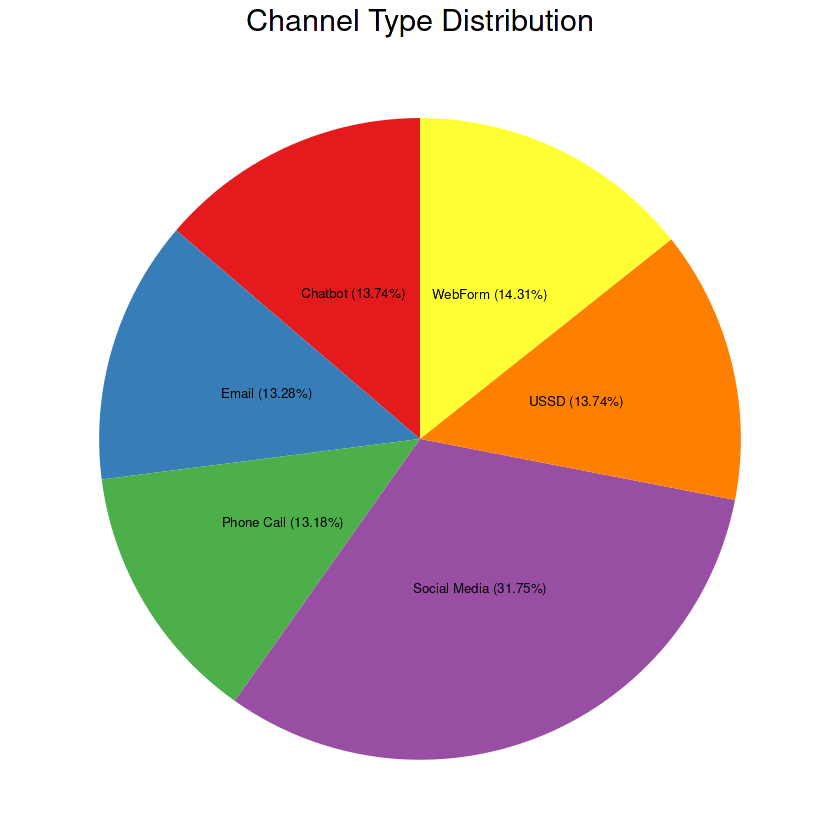

In [182]:
#Lets see how the channels are used in ticket opening
    
service_data %>%
group_by(Channel) %>%
summarise(count = n()) %>%
arrange(count)


#Lets visualize the channels distribution
service_data %>%
  group_by(Channel) %>%
  summarise(count = n()) %>%
  arrange(Channel, count) %>%
  ggplot(aes(x = "", y = count, fill = Channel)) + 
  geom_bar(width = 1, stat = "identity") + 
  coord_polar("y", start = 0) +
  scale_fill_brewer(palette = "Set1") +
  theme_void() +
  geom_text(aes(label = paste0(Channel, " (", round(100*count/sum(count), 2), "%)")), position = position_stack(vjust = 0.5), size = 2.7) +
  labs(title="Channel Type Distribution") +
  theme(plot.title = element_text(hjust = 0.5, size = 18)) +
  theme(legend.position = "none")

#### Phone calls are the least used channel in opening tickets, while Social media is the most used medium for opening tickets.

Fault_Type,count
<chr>,<int>
Intrusions,9
Power Loss,17
Router Failure,19
Traffic Spikes,22
Support network failures,124
hardware failure,180
Routine Service,493
Line damage,900
Customers End,2400


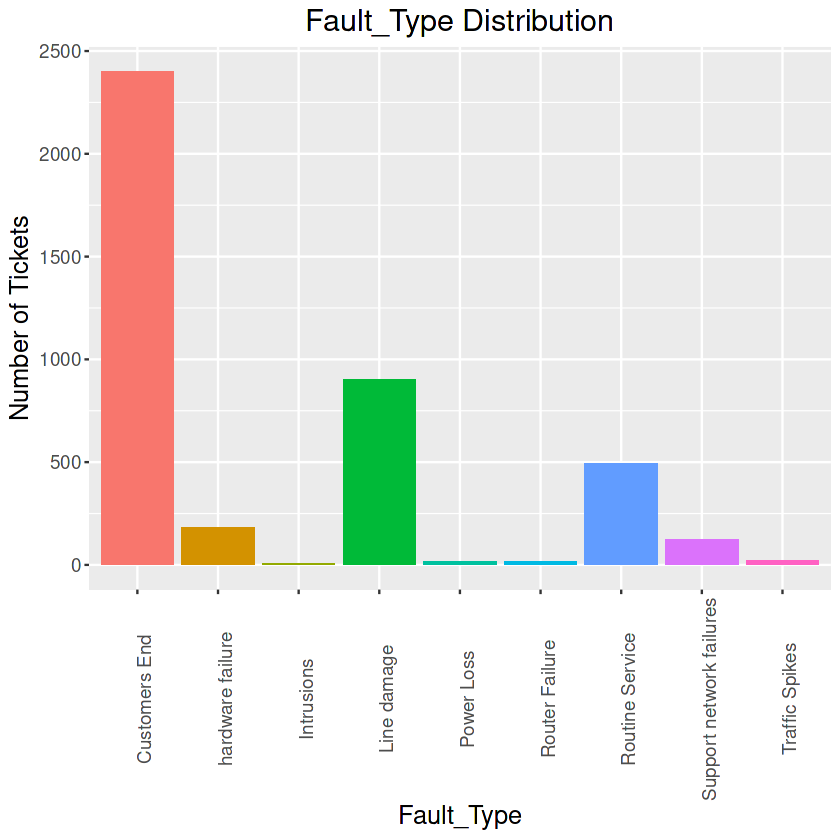

In [183]:
#Lets see the count of each fault type
service_data %>%
group_by(Fault_Type) %>%
summarise(count = n()) %>%
arrange(count)




#Lets see how the fault type are distributed

service_data %>%
group_by(Fault_Type) %>%
summarise(count = n()) %>%
arrange(count) %>%
ggplot(aes(x = Fault_Type, y = count,  fill=Fault_Type)) + 
scale_fill_discrete(guide = 'none') +
  geom_bar(stat = "identity") +
theme(axis.text.x=element_text(angle=90)) +
theme(axis.text = element_text(size = 11)) +
 #labels
  labs(title="Fault_Type Distribution") + 
      ylab("Number of Tickets") + 
      xlab("Fault_Type") +
    theme(plot.title = element_text(hjust = 0.5, size = 18)) +
  theme(axis.title.x = element_text(size = 15)) +
  theme(axis.title.y = element_text(size = 15)) 

#### We can see from both the summary and bar chart that Customer_end Fault type is the most widely reported fault_type. While faults like intrusion, hardware failure, power loss and traffic spikes seem to have very low number of reports compared to others.

State,count
<chr>,<int>
JIGAWA,21
TARABA,23
BAYELSA,26
EBONYI,27
AKWA IBOM,38
OSUN,44
ABIA,45
CROSS RIVER,50
ADAMAWA,60


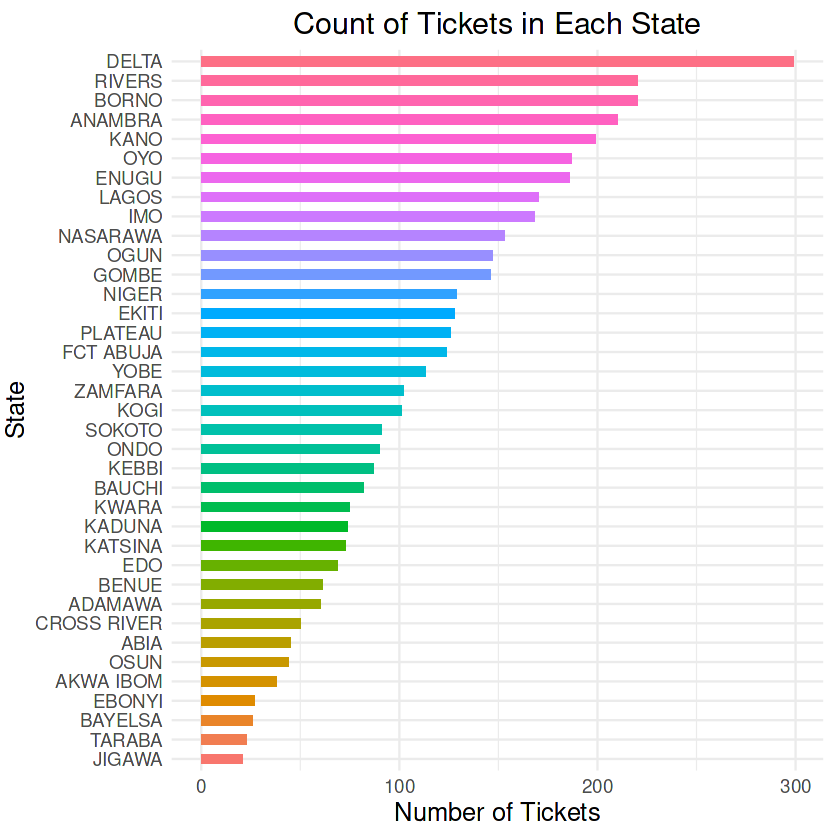

In [184]:
#Lets see the the number of tickets from each state
service_data %>%
group_by(State) %>%
summarise(count = n()) %>%
arrange(count)



service_data %>%
  group_by(State) %>%
  summarise(count = n()) %>%
  mutate(State = reorder(State, count)) %>% # reorder State in acending order
  ggplot(aes(y = State, x = count, fill = State)) +
  geom_col(width = 0.5) +
  scale_fill_discrete(guide = 'none') +
  labs(title = "Count of Tickets in Each State",
       x = "Number of Tickets",
       y = "State") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, size = 18),
        axis.title.x = element_text(size = 15),
        axis.title.y = element_text(size = 15),
        axis.text = element_text(size = 11)) +
  theme(plot.margin = unit(c(0.5, 0.7, 0.5, 0.2), "lines"))


#### Both the summary and the chart reveals that most tickets where actually opened by customers from Delta state, while Jigawa state has the least tickets opened by customers.

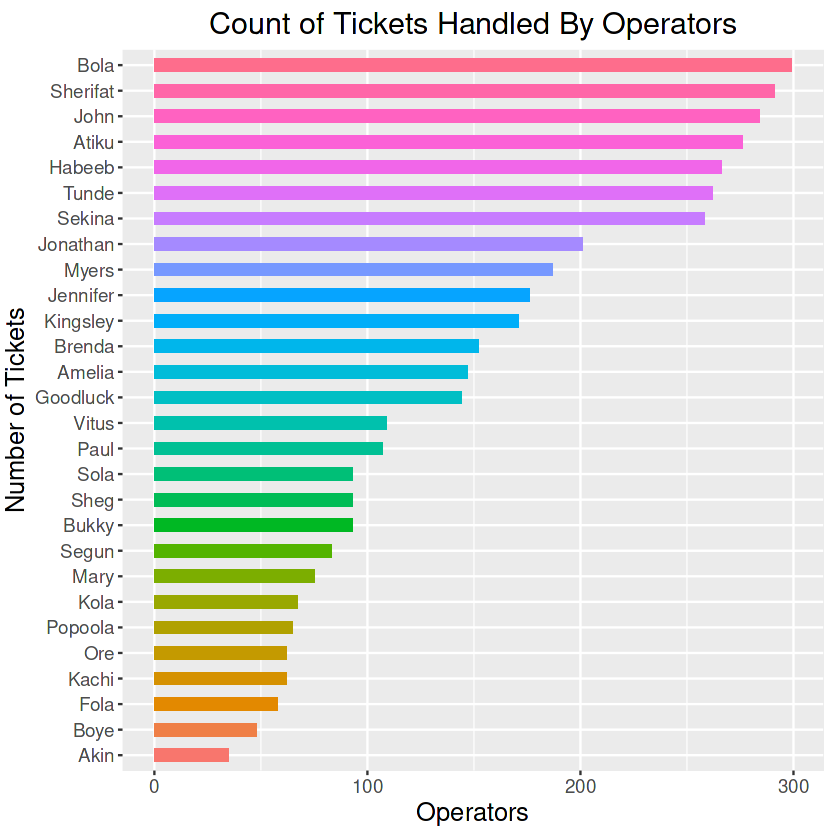

In [185]:
#Lets see how the Operators are doing

service_data %>%
  group_by(Operator) %>%
  summarise(count = n()) %>%
 mutate(Operator = reorder(Operator, count)) %>%
  ggplot(aes(x = count, y = Operator, fill = Operator)) +
  geom_col(width= 0.5, position="dodge") +
  scale_fill_discrete(guide = 'none') +
theme(plot.margin = unit(c(0.5, 0.7, 0.5, 0.2), "lines")) +
theme(axis.text = element_text(size = 11)) +
#labels
  labs(title="Count of Tickets Handled By Operators",
       x = "Operators",
       y = "Number of Tickets") + 
  theme(plot.title = element_text(hjust = 0.5, size = 18)) +
  theme(axis.title.x = element_text(size = 15)) +
  theme(axis.title.y = element_text(size = 15))

#### we can deduce from this chat that Akin as attended to the least number tickets than any other operator, Next is Boye and then Fola. On the other hand Bola has had the highest number of tickets attended to. 

In [186]:
# Convert "ticket_open_time" to POSIXlt format
service_data$Ticket_Open_Time <- as.POSIXlt(service_data$Ticket_Open_Time, format="%Y-%m-%d %H:%M:%S")

# Extract the hour from "ticket_open_time" and create a new "hour" column
service_data$Hour_Of_Day <- format(service_data$Ticket_Open_Time, "%l%p")

# View the updated dataset with the new "hour" column
head(service_data)

,Report_ID,Service_Name,Channel,Customer_Name,State,Ticket_Open_Time,Ticket_Resp_Time,Issue_Res_Time,Fault_Type,Operator,Manager,Ticket_Close_Time,Ticket_Status,Business_Status,Ticket_Open_Date,Response_Time,Resolve_Time,Reslv_Time,Weekdays,Hour_Of_Day
,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<dttm>,<chr>,<chr>,<date>,<chr>,<chr>,<drtn>,<chr>,<chr>
1,AXA-20201210-6072-WLESS,Wireless,USSD,FoodCo,ENUGU,2020-12-10 10:53:25,2020-12-10 10:53:30,2020-12-10 13:01:54,Line damage,Akin,Wale,2020-12-10 17:37:43,Completed,Closed,2020-12-10,00:00:05,02:08:24,2.141389 hours,Thursday,10AM
2,AXA-20201231-1474-WLESS,Wireless,Social Media,FoodCo,ZAMFARA,2020-12-31 17:25:03,2020-12-31 17:31:14,2020-12-31 22:49:44,Customers End,Akin,Wale,2021-01-01 14:39:29,Completed,Closed,2020-12-31,00:06:11,05:18:30,5.411389 hours,Thursday,5PM
3,AXA-20201206-4466-WLESS,Wireless,Email,BAGCO,DELTA,2020-12-06 10:16:41,2020-12-06 10:21:20,2020-12-06 15:58:49,Customers End,Akin,Wale,2020-12-06 19:37:24,Completed,Closed,2020-12-06,00:04:39,05:37:29,5.702222 hours,Sunday,10AM
4,AXA-20201219-3279-WiFi4,WiFI - 4,Phone Call,Union,KATSINA,2020-12-19 15:17:17,2020-12-19 15:26:55,2020-12-19 18:08:25,Line damage,Akin,Wale,2020-12-19 23:34:47,Completed,Closed,2020-12-19,00:09:38,02:41:30,2.852222 hours,Saturday,3PM
5,AXA-20201231-1420-HSE,High speed Internet,Social Media,Addide,AKWA IBOM,2020-12-31 20:13:03,2020-12-31 20:13:49,2021-01-01 00:48:55,Customers End,Akin,Wale,2021-01-02 06:56:59,Completed,Closed,2020-12-31,00:00:46,04:35:06,4.597778 hours,Thursday,8PM
6,AXA-20201223-4170-WiFi8,WiFI - 8,Chatbot,Denna,IMO,2020-12-23 14:04:06,2020-12-23 14:09:11,2020-12-23 19:11:33,Customers End,Akin,Wale,2020-12-24 00:46:14,Completed,Closed,2020-12-23,00:05:05,05:02:22,5.124167 hours,Wednesday,2PM


In [187]:
#Lets count the number of tickets open each hour
service_data %>%
group_by(Hour_Of_Day) %>%
summarise(count = n()) %>%
arrange(count)

Hour_Of_Day,count
<chr>,<int>
2AM,9
5AM,11
12AM,14
1AM,17
3AM,18
4AM,25
7AM,26
6AM,27
10PM,28


#### More tickets are created around 2pm in the afternoon more than any hour of the day. And 2am have the least number of tickets opened. 

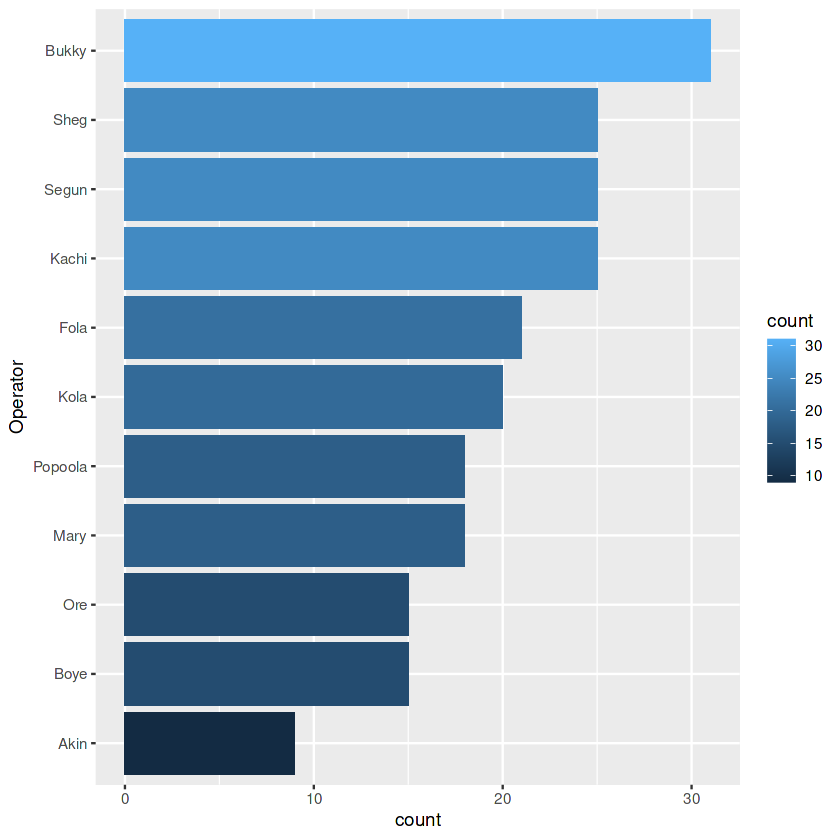

In [188]:
#Lets see how some certain operators are doing
service_data %>%
group_by(Operator) %>%
  filter(Operator %in% c("Shola", "Sheg", "Bukky", "Segun", "Mary", "Kola", "Popoola", "Ore", "Kachi", "Fola", "Boye", "Akin") &
         Hour_Of_Day %in% c("8AM", "9AM", "10AM", "11AM", "12PM", "1PM", "2PM", "3PM")) %>%
summarize(count=n()) %>%
 mutate(Operator = reorder(Operator, count)) %>%
ggplot(aes(x=count, y=Operator, fill=count)) +
geom_col()





#### I just inspected to see how the operators that had less than 100 tickets performed during rush hours(by rush hours i mean, from 9AM TO 3PM) and i discovered that they aren't performing well. There are over 3564 tickets during the rush hour alone and more than 90% got less than 30 tickets.

#### With this i can also deduse the fact that some operators over work and some under work might be one of the reasons why the average ticket response time exceeds 15seconds. 

In [189]:
#i want to create a new column called "Time_Of_Resp" , its basically the time difference between ticket_open_time and ticket_resp_time, 
#but this time its in numeric format

#Lets first convert the two datetime columns to POSIXct
service_data$Ticket_Open_Time <- as.POSIXct(service_data$Ticket_Open_Time)
service_data$Ticket_Resp_Time <- as.POSIXct(service_data$Ticket_Resp_Time)


# Calculate the time difference in seconds
service_data$Time_Of_Resp <- as.numeric( difftime(service_data$Ticket_Resp_Time, service_data$Ticket_Open_Time, units = "secs"))


head(service_data)

,Report_ID,Service_Name,Channel,Customer_Name,State,Ticket_Open_Time,Ticket_Resp_Time,Issue_Res_Time,Fault_Type,Operator,⋯,Ticket_Close_Time,Ticket_Status,Business_Status,Ticket_Open_Date,Response_Time,Resolve_Time,Reslv_Time,Weekdays,Hour_Of_Day,Time_Of_Resp
,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,<chr>,<chr>,⋯,<dttm>,<chr>,<chr>,<date>,<chr>,<chr>,<drtn>,<chr>,<chr>,<dbl>
1,AXA-20201210-6072-WLESS,Wireless,USSD,FoodCo,ENUGU,2020-12-10 10:53:25,2020-12-10 10:53:30,2020-12-10 13:01:54,Line damage,Akin,⋯,2020-12-10 17:37:43,Completed,Closed,2020-12-10,00:00:05,02:08:24,2.141389 hours,Thursday,10AM,5
2,AXA-20201231-1474-WLESS,Wireless,Social Media,FoodCo,ZAMFARA,2020-12-31 17:25:03,2020-12-31 17:31:14,2020-12-31 22:49:44,Customers End,Akin,⋯,2021-01-01 14:39:29,Completed,Closed,2020-12-31,00:06:11,05:18:30,5.411389 hours,Thursday,5PM,371
3,AXA-20201206-4466-WLESS,Wireless,Email,BAGCO,DELTA,2020-12-06 10:16:41,2020-12-06 10:21:20,2020-12-06 15:58:49,Customers End,Akin,⋯,2020-12-06 19:37:24,Completed,Closed,2020-12-06,00:04:39,05:37:29,5.702222 hours,Sunday,10AM,279
4,AXA-20201219-3279-WiFi4,WiFI - 4,Phone Call,Union,KATSINA,2020-12-19 15:17:17,2020-12-19 15:26:55,2020-12-19 18:08:25,Line damage,Akin,⋯,2020-12-19 23:34:47,Completed,Closed,2020-12-19,00:09:38,02:41:30,2.852222 hours,Saturday,3PM,578
5,AXA-20201231-1420-HSE,High speed Internet,Social Media,Addide,AKWA IBOM,2020-12-31 20:13:03,2020-12-31 20:13:49,2021-01-01 00:48:55,Customers End,Akin,⋯,2021-01-02 06:56:59,Completed,Closed,2020-12-31,00:00:46,04:35:06,4.597778 hours,Thursday,8PM,46
6,AXA-20201223-4170-WiFi8,WiFI - 8,Chatbot,Denna,IMO,2020-12-23 14:04:06,2020-12-23 14:09:11,2020-12-23 19:11:33,Customers End,Akin,⋯,2020-12-24 00:46:14,Completed,Closed,2020-12-23,00:05:05,05:02:22,5.124167 hours,Wednesday,2PM,305


In [190]:
#First lets count the number of tickets below 15seconds
service_data %>%
filter(Time_Of_Resp <= 15) %>%
count(number_of_tickets = n())


number_of_tickets,n
<int>,<int>
105,105


In [191]:
#First lets count the number of tickets below 15seconds
service_data %>%
filter(Time_Of_Resp > 15) %>%
count(number_of_tickets = n())


number_of_tickets,n
<int>,<int>
4059,4059


In [192]:
#Lets check the average time for reponding to tickket each hour of the day
service_data %>%
group_by(Hour_Of_Day) %>%
summarize(Average_Response_Time = mean(Time_Of_Resp))

Hour_Of_Day,Average_Response_Time
<chr>,<dbl>
1AM,303.0000
1PM,317.5516
2AM,262.5556
2PM,326.4442
3AM,236.7778
3PM,335.0069
4AM,344.2800
4PM,320.0000
5AM,310.6364


In [193]:
#Lets check the average time of response for each chanel

service_data %>%
group_by ( Channel) %>%

summarize(average_reponse_time = mean(Time_Of_Resp))

Channel,average_reponse_time
<chr>,<dbl>
Chatbot,334.1014
Email,332.0253
Phone Call,328.6230
Social Media,317.0045
USSD,341.5979
WebForm,315.4950


In [194]:
#Now lets check the median time for tickets to be responded to. 

service_data %>%
  group_by(Operator) %>%
  summarize(Median_time = median(Time_Of_Resp))


Operator,Median_time
<chr>,<dbl>
Akin,348.0
Amelia,324.0
Atiku,375.0
Bola,311.0
Boye,367.0
Brenda,326.0
Bukky,270.0
Fola,327.0
Goodluck,346.5


In [195]:
#Average response time in seconds of each ticket
service_data %>%
group_by( Hour_Of_Day) %>%
summarize(average_time = mean(Time_Of_Resp)) 





Hour_Of_Day,average_time
<chr>,<dbl>
1AM,303.0000
1PM,317.5516
2AM,262.5556
2PM,326.4442
3AM,236.7778
3PM,335.0069
4AM,344.2800
4PM,320.0000
5AM,310.6364


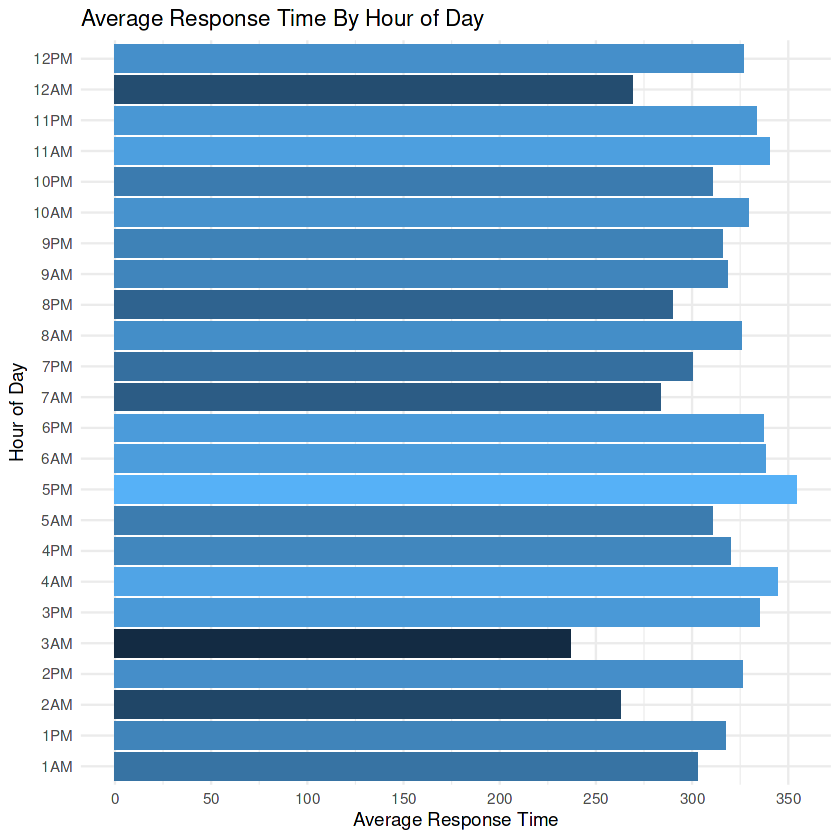

In [196]:
#Lets visualize the average response time in every hour of the day
service_data %>%
  mutate(Hour_Of_Day = factor(Hour_Of_Day),
         Time_Of_Resp = as.numeric(Time_Of_Resp)) %>%
  group_by(Hour_Of_Day) %>%
  summarize(average_response_time = mean(Time_Of_Resp)) %>%
  ggplot(aes(x = average_response_time, y = Hour_Of_Day, fill = average_response_time)) +
  geom_col() +
  scale_fill_gradient(guide = "none") +
  labs(title = "Average Response Time By Hour of Day",
       x = "Average Response Time",
       y = "Hour of Day") +
  theme(plot.title = element_text(hjust = 0.5, size = 18),
        axis.text = element_text(size = 11),
        axis.title.x = element_text(size = 15),
        axis.title.y = element_text(size = 15),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        panel.border = element_blank(),
        plot.margin = unit(c(0.5, 0.7, 0.5, 0.2), "lines"),
        plot.background = element_blank()) +
  coord_cartesian(clip = 'off') +
  expand_limits(x = 0) +
  scale_x_continuous(breaks = seq(0, 500, by = 50)) +
  theme_minimal()


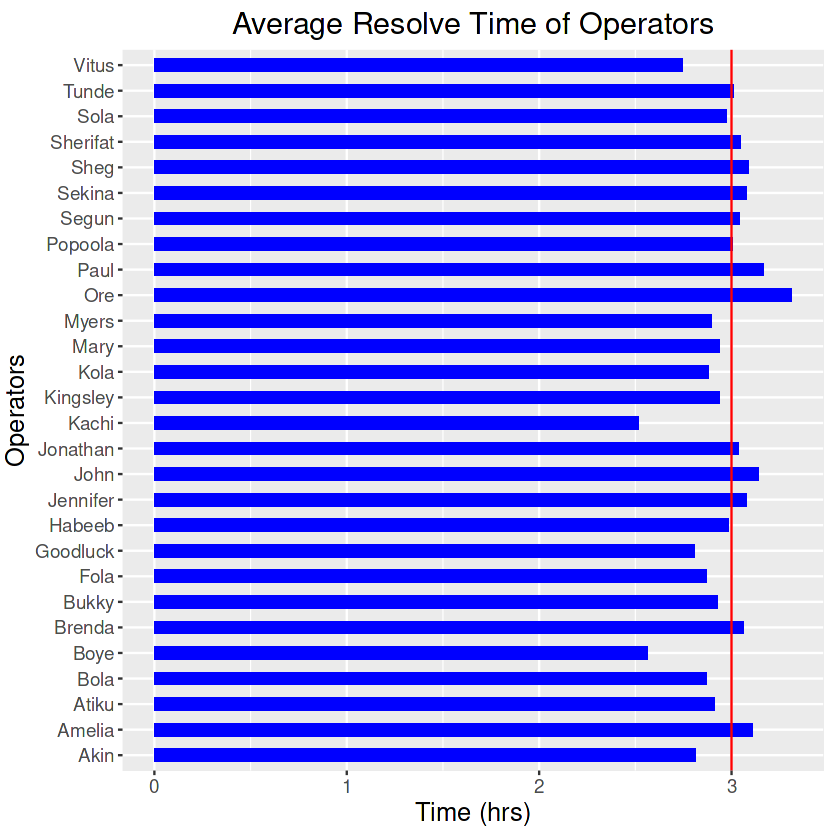

In [197]:
#Lets check the resolve time for each operator to see how they are performing 

service_data %>%
  group_by(Operator) %>%
  summarize(avg_resolve_time = mean(as.numeric(Reslv_Time))) %>%
  ggplot(aes(x = avg_resolve_time, y = Operator)) +
  geom_col(fill = "blue", width = 0.5, position = "dodge") +
  labs(title = "Average Resolve Time of Operators",
       x = "Time (hrs)",
       y = "Operators") +
  theme(plot.title = element_text(hjust = 0.5, size = 18),
        axis.title.x = element_text(size = 15),
        axis.title.y = element_text(size = 15),
        axis.text = element_text(size = 11),
        plot.margin = unit(c(0.5, 0.7, 0.5, 0.2), "lines")) +
  geom_vline(xintercept = 3, color = "red", size = 0.5) +
  guides(fill = "none")


#### We can see the average resolve time of the Operators of Zentel Operators, some have their averages below 3hrs and while some have their averages above 3hrs.

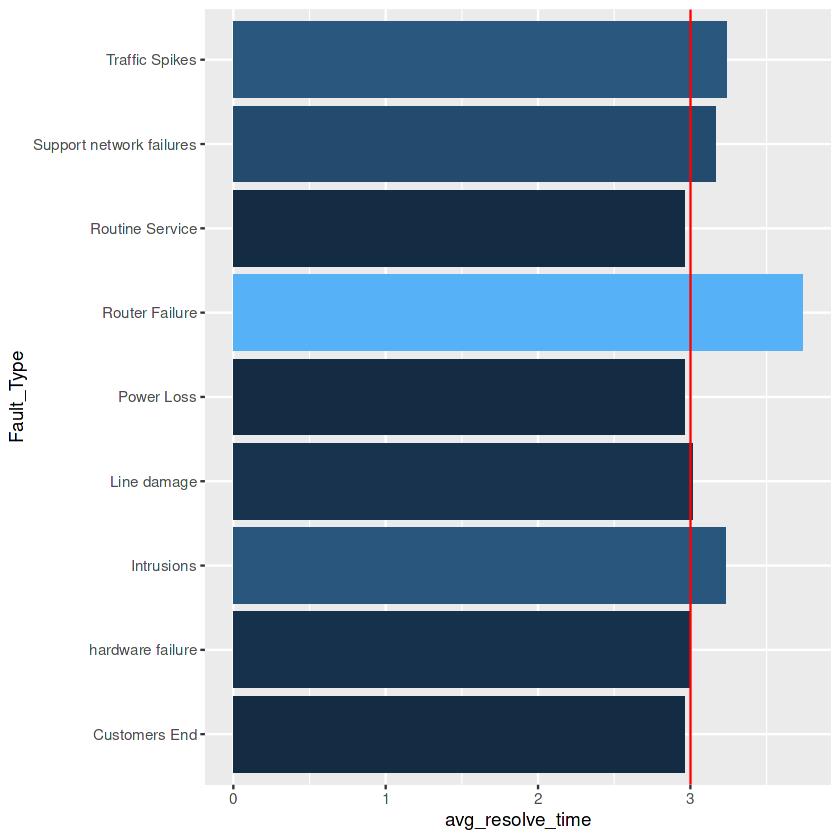

In [198]:
service_data %>%
  group_by(Fault_Type) %>%
  summarize(avg_resolve_time = mean(as.numeric(Reslv_Time))) %>%
ggplot(aes(x=avg_resolve_time, y=Fault_Type, fill=avg_resolve_time)) +
geom_col() +
geom_vline(xintercept = 3, color = "red", size = 0.5) +
  guides(fill = "none")

In [199]:
service_data<- merge(service_data, employee[,c("Employee_name","Manager")], by.x = "Operator", by.y = "Employee_name")

service_data <- service_data %>%
rename(Manager = Manager.y)

head(service_data)

,Operator,Report_ID,Service_Name,Channel,Customer_Name,State,Ticket_Open_Time,Ticket_Resp_Time,Issue_Res_Time,Fault_Type,⋯,Ticket_Status,Business_Status,Ticket_Open_Date,Response_Time,Resolve_Time,Reslv_Time,Weekdays,Hour_Of_Day,Time_Of_Resp,Manager
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,<chr>,⋯,<chr>,<chr>,<date>,<chr>,<chr>,<drtn>,<chr>,<chr>,<dbl>,<chr>
1,Akin,AXA-20201210-6072-WLESS,Wireless,USSD,FoodCo,ENUGU,2020-12-10 10:53:25,2020-12-10 10:53:30,2020-12-10 13:01:54,Line damage,⋯,Completed,Closed,2020-12-10,00:00:05,02:08:24,2.141389 hours,Thursday,10AM,5,Wale
2,Akin,AXA-20201231-1474-WLESS,Wireless,Social Media,FoodCo,ZAMFARA,2020-12-31 17:25:03,2020-12-31 17:31:14,2020-12-31 22:49:44,Customers End,⋯,Completed,Closed,2020-12-31,00:06:11,05:18:30,5.411389 hours,Thursday,5PM,371,Wale
3,Akin,AXA-20201206-4466-WLESS,Wireless,Email,BAGCO,DELTA,2020-12-06 10:16:41,2020-12-06 10:21:20,2020-12-06 15:58:49,Customers End,⋯,Completed,Closed,2020-12-06,00:04:39,05:37:29,5.702222 hours,Sunday,10AM,279,Wale
4,Akin,AXA-20201219-3279-WiFi4,WiFI - 4,Phone Call,Union,KATSINA,2020-12-19 15:17:17,2020-12-19 15:26:55,2020-12-19 18:08:25,Line damage,⋯,Completed,Closed,2020-12-19,00:09:38,02:41:30,2.852222 hours,Saturday,3PM,578,Wale
5,Akin,AXA-20201231-1420-HSE,High speed Internet,Social Media,Addide,AKWA IBOM,2020-12-31 20:13:03,2020-12-31 20:13:49,2021-01-01 00:48:55,Customers End,⋯,Completed,Closed,2020-12-31,00:00:46,04:35:06,4.597778 hours,Thursday,8PM,46,Wale
6,Akin,AXA-20201223-4170-WiFi8,WiFI - 8,Chatbot,Denna,IMO,2020-12-23 14:04:06,2020-12-23 14:09:11,2020-12-23 19:11:33,Customers End,⋯,Completed,Closed,2020-12-23,00:05:05,05:02:22,5.124167 hours,Wednesday,2PM,305,Wale


In [200]:
#Lets check the average resolve time for each Manager
service_data %>%
  group_by(Manager) %>%
  summarize(avg_resolve_time = mean(as.numeric(Reslv_Time))) 

Manager,avg_resolve_time
<chr>,<dbl>
Kerry,2.991220
Seun,2.985312
Victor,3.004797
Wale,2.878923


#### We can see that the average resolve time for each Manager doesn't exceed the 3hr mark.

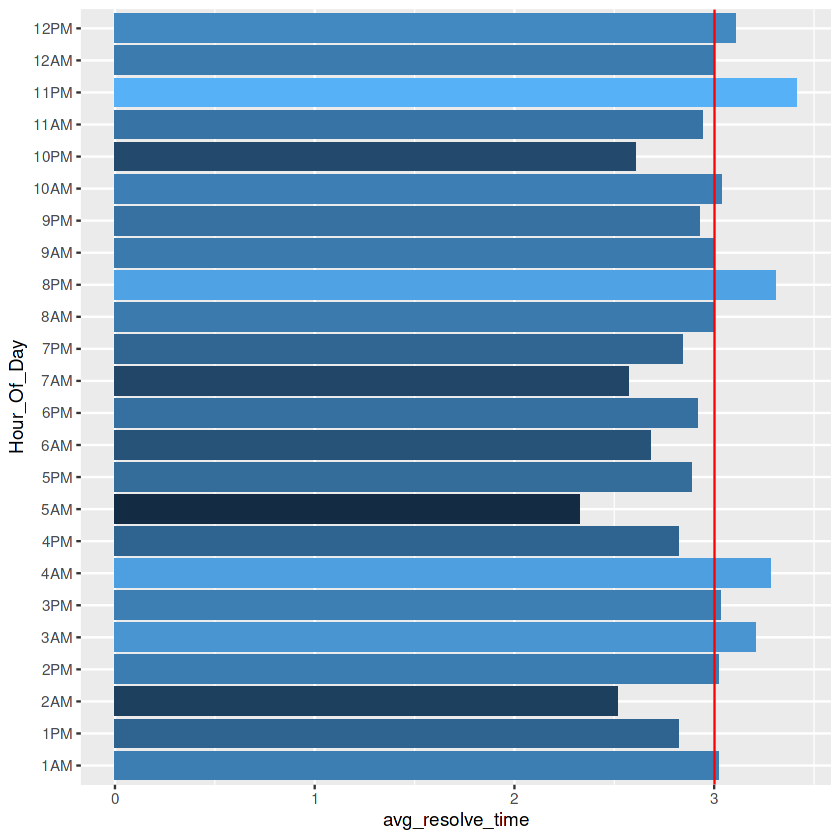

In [201]:
# Lets visualise to see if the time of the day in which a ticket was opened affects the average time for tickets to be resolved.
service_data %>%
  group_by(Hour_Of_Day) %>%
  summarize(avg_resolve_time = mean(as.numeric(Reslv_Time))) %>%
ggplot(aes(x=avg_resolve_time, y=Hour_Of_Day, fill=avg_resolve_time)) +
geom_col() +
 geom_vline(xintercept = 3, color = "red", size = 0.5) +
  guides(fill = "none")


In [202]:
#Now lets check the resolve time of each customer.

service_data %>%
group_by(Customer_Name) %>%
summarize(avg_resolve_time = mean(as.numeric(Reslv_Time))) %>%
arrange(desc(avg_resolve_time))

Customer_Name,avg_resolve_time
<chr>,<dbl>
GameStack,5.095556
Onehyr,4.455889
Gloo,4.362407
Zendesky,4.303519
Fidelity,4.248846
Dang,4.205340
Comvicong,4.199167
Shell,4.082167
Tonyson,4.044722


#### I noticed through the bar chart that Tickets opened during the night and early hours of the day are the ones that exceeds the 3hrs mark.
#### With this, i will also be supporting the decision of one of the executives to optimise the Daily turn around time between 6pm- 9pm. 

## Key Takeaway

- #### Social media is the primary channel used by customers to open tickets, whereas phone calls are the least frequently used channel.

- #### "Customer End" is the most commonly reported fault type, accounting for more than 50% of all tickets.

- #### The majority of tickets are created by customers in Delta state, while Jigawa state has the lowest number of tickets.

- #### Operators Bola, Sherifat, John, and Atiku have handled a larger volume of tickets compared to other operators.

- #### The peak hours for ticket creation are between 12pm-3pm.

- #### Only 105 tickets meet the average response time of 15 seconds, while 4059 tickets exceed this threshold.

- #### Eleven out of twenty-eight operators have a resolution time exceeding three hours, with some exceeding it by a small margin and others by a larger margin.

- #### Router failures take longer to resolve than any other fault type.

- #### The managers' average resolution time does not exceed three hours, rounded up to two decimal places.

- #### Based on the data, it appears that Zental Network does not currently use a shift system for working hours, which may be counterproductive.

- #### Some OPerators underwork and some are overworked.

## Recommendations

- #### It is recommended that promotions be targeted towards states with low ticket volumes to increase awareness of Zentel Network in those areas.

- #### A survey should be conducted to identify the root cause of the high frequency of "Customer End" as the reported fault type.

- #### A team-wide reorientation is necessary to improve the average response time of each operator, which currently exceeds 15 seconds.

- #### It is advised that Zental Network implement a shift system to optimize productivity.

- #### The Operators with low number ticket attended to, need special attention from the Hr department to find the cause of the low number of tickets.

- #### To ensure adequate support during peak hours, the number of staff working during the 8AM - 3AM shift should be increased while reducing the number of staff working during the 9PM - 7AM shift.

- #### Operators should be trained in handling fault types such as "Traffic Spikes," "Support Network Failures," "Router Failures," and "Intrusions" to improve resolution times.